In [1]:
# Load data and packages
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

directory_path = os.getcwd() + "\\Data\\sorting_event_volumes_2023.csv"

df = pd.read_csv(directory_path)

In [2]:
# Data cleaning
print("Number of rows is: " + str(df.shape[0]))

df = df.loc[df["event_type"] == "LAJ", :]
df.drop(['event_location', 'input_belt', 'position'], axis=1, inplace = True)
df.dropna(inplace = True)
df['output_belt'] = df['output_belt'].astype(int)
df['scanning_date'] = pd.to_datetime(df['scanning_date'])

print("Number of rows cleaned data is: " + str(df.shape[0]))

Number of rows is: 8949721
Number of rows cleaned data is: 7450939


In [3]:
# Data preparation
df['day'] = df['scanning_date'].dt.day
df['month'] = df['scanning_date'].dt.month
df['weekday'] = df['scanning_date'].dt.day_of_week + 1
df['week'] = df['scanning_date'].dt.day_of_year // 7 + 1
df['yearday'] = df['scanning_date'].dt.day_of_year
df['yearday_sin'] = np.sin(df['yearday'] / 7 * 2 * np.pi)
df['yearday_cos'] = np.cos(df['yearday'] / 7 * 2 * np.pi)

sorting_center_names = df["sorting_center_name"].unique()
df["sorting_center_name"].value_counts()

VANTAA       4888466
TAMPERE      1154436
KUOPIO        578274
LIETO         443087
OULU          354047
SEINÄJOKI      32629
Name: sorting_center_name, dtype: int64

In [7]:
df

,sorting_center_name,event_type,scanning_date,output_belt,no_of_events,day,month,weekday,week,yearday,yearday_sin,yearday_cos
16791,VANTAA,LAJ,2023-01-02,1,13,2,1,1,1,2,0.974928,-0.222521
16792,VANTAA,LAJ,2023-01-02,10,4,2,1,1,1,2,0.974928,-0.222521
16793,VANTAA,LAJ,2023-01-02,10,2,2,1,1,1,2,0.974928,-0.222521
16794,VANTAA,LAJ,2023-01-02,10,7,2,1,1,1,2,0.974928,-0.222521
16795,VANTAA,LAJ,2023-01-02,10,3,2,1,1,1,2,0.974928,-0.222521
...,...,...,...,...,...,...,...,...,...,...,...,...
8789785,OULU,LAJ,2023-12-27,0,105,27,12,3,52,361,-0.433884,-0.900969
8789786,OULU,LAJ,2023-12-27,0,707,27,12,3,52,361,-0.433884,-0.900969
8789787,OULU,LAJ,2023-12-28,0,3,28,12,4,52,362,-0.974928,-0.222521
8789788,OULU,LAJ,2023-12-28,0,792,28,12,4,52,362,-0.974928,-0.222521


In [12]:
#aggregating data
adf = df.groupby(['scanning_date','sorting_center_name'])['no_of_events'].sum().reset_index()
adf['day'] = adf['scanning_date'].dt.day
adf['month'] = adf['scanning_date'].dt.month
adf['weekday'] = adf['scanning_date'].dt.day_of_week + 1
adf['week'] = adf['scanning_date'].dt.day_of_year // 7 + 1
adf['yearday'] = adf['scanning_date'].dt.day_of_year
adf['yearday_sin'] = np.sin(adf['yearday'] / 7 * 2 * np.pi)
adf['yearday_cos'] = np.cos(adf['yearday'] / 7 * 2 * np.pi)
adf

,scanning_date,sorting_center_name,no_of_events,day,month,weekday,week,yearday,yearday_sin,yearday_cos
0,2023-01-01,LIETO,3650,1,1,7,1,1,7.818315e-01,0.623490
1,2023-01-01,OULU,1441,1,1,7,1,1,7.818315e-01,0.623490
2,2023-01-01,TAMPERE,1458,1,1,7,1,1,7.818315e-01,0.623490
3,2023-01-02,KUOPIO,23812,2,1,1,1,2,9.749279e-01,-0.222521
4,2023-01-02,LIETO,44598,2,1,1,1,2,9.749279e-01,-0.222521
...,...,...,...,...,...,...,...,...,...,...
1876,2023-12-29,OULU,19831,29,12,5,52,363,-7.818315e-01,0.623490
1877,2023-12-29,SEINÄJOKI,15100,29,12,5,52,363,-7.818315e-01,0.623490
1878,2023-12-29,TAMPERE,34499,29,12,5,52,363,-7.818315e-01,0.623490
1879,2023-12-29,VANTAA,129349,29,12,5,52,363,-7.818315e-01,0.623490


In [6]:
#missing dates: 9 april, 24 june, 24 dec, 25 dec, 31 dec

In [7]:
#import plotly.express as px
#fig_weekday = px.histogram(df.weekday,x='weekday')
#fig_weekday.update_layout(bargap=0.2)
#fig_weekday.show()

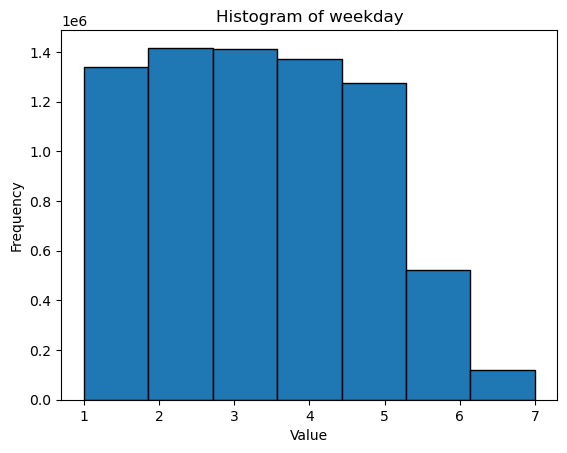

In [9]:
# Create the histogram
plt.hist(df['weekday'], bins=7, edgecolor='black')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of weekday')

# Show the plot
plt.show()

C:\Users\krist\AppData\Local\Temp\ipykernel_28020\2405111518.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  target_covariance_matrix = df.corr()[['no_of_events']]


              no_of_events
output_belt       0.012717
no_of_events      1.000000
day               0.001862
month             0.005533
weekday          -0.030330
week              0.005455


<Axes: >

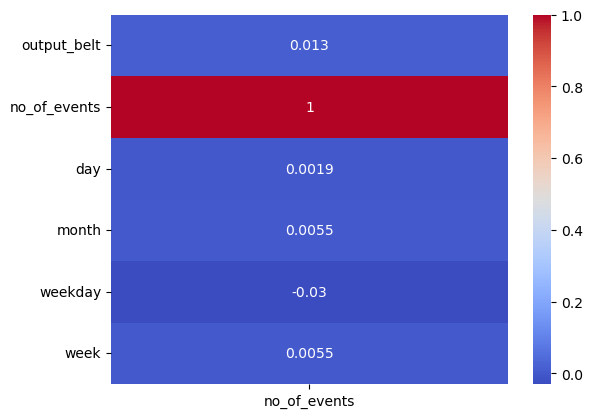

In [32]:
import seaborn as sns
#determine correlations
target_covariance_matrix = df.corr()[['no_of_events']]
print(target_covariance_matrix)
sns.heatmap(target_covariance_matrix,annot=True, cmap='coolwarm')

In [54]:
X = df[['week','day','weekday']]
y = df['no_of_events']

In [55]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [56]:
#print coefficient values for unstandardized model
print(model.coef_)
print(model.intercept_)

[ 0.01974053  0.00362999 -0.79483344]
12.943457618632333


In [57]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred = model.predict(X)
# Calculate metrics
r_squared = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = mean_squared_error(y, y_pred, squared=False)

# Print the metrics
print(f"R-squared: {r_squared:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")

R-squared: 0.0010
Mean Absolute Error: 11.6412
Mean Squared Error: 1738.8299
Root Mean Squared Error: 41.6993


In [58]:
#standardize the values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = LinearRegression()

# Fit the model to the standardized data
model.fit(X_scaled, y)


LinearRegression()

In [59]:
#coefficients of the standardized multiple regression model
print(['week','day','weekday'])
print(model.coef_)

['week', 'day', 'weekday']
[ 0.2987211   0.03185141 -1.2817395 ]
